#### Imports

In [1]:
import os
import os.path

import matplotlib.pyplot as plt
import numpy as np

import skimage.io
import skimage.morphology

import tensorflow as tf
import keras

import utils.metrics
import utils.model_builder

Using TensorFlow backend.


In [2]:
import utils.dirtools

#### Config

In [3]:
# build session running on GPU 1
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
configuration.gpu_options.visible_device_list = "0"
session = tf.compat.v1.Session(config = configuration)

# apply session
tf.compat.v1.keras.backend.set_session(session)

In [5]:
config_vars = {'root_directory': '/home/jupyter/cell-segmentation/',
 'max_training_images': 0,
 'create_split_files': False,
 'training_fraction': 0.5,
 'validation_fraction': 0.25,
 'transform_images_to_PNG': True,
 'pixel_depth': 8,
 'min_nucleus_size': 25,
 'boundary_size': 2,
 'augment_images': False,
 'elastic_points': 16,
 'elastic_distortion': 5,
 'elastic_augmentations': 10,
 'learning_rate': 0.0001,
 'epochs': 15,
 'steps_per_epoch': 500,
 'batch_size': 9 ,
 'val_batch_size': 1,
 'rescale_labels': True,
 'crop_size': 256,
 'cell_min_size': 1,
 'boundary_boost_factor': 1,
 'object_dilation': 3,
 'raw_images_dir': '/home/jupyter/cell-segmentation/raw_images/',
 'raw_annotations_dir': '/home/jupyter/cell-segmentation/raw_annotations/',
 'path_files_training': '/home/jupyter/cell-segmentation/training.txt',
 'path_files_validation': '/home/jupyter/cell-segmentation/validation.txt',
 'path_files_test': '/home/jupyter/cell-segmentation/test.txt',
 'normalized_images_dir': '/home/jupyter/cell-segmentation/resized_aitslab_png_images/',
 'boundary_labels_dir': '/home/jupyter/cell-segmentation/aitslab_boundary_labels/resized_images/',
 'experiment_dir': '/home/fvitez/nuclei_detection/experiments/bbbc/out/',
 'probmap_out_dir': '/home/fvitez/nuclei_detection/experiments/bbbc/out/prob/',
 'labels_out_dir': '/home/fvitez/nuclei_detection/experiments/bbbc/out/segm/',
 'model_file': '/home/fvitez/nuclei_detection/experiments/bbbc/model.hdf5',
 'csv_log_file': '/home/fvitez/nuclei_detection/experiments/bbbc/log.csv'}

In [6]:
#from config import config_vars

# Partition of the data to make predictions (test or validation)
#partition = "validation"

experiment_name = 'bbbc'

config_vars = utils.dirtools.setup_experiment(config_vars, experiment_name)

#data_partitions = utils.dirtools.read_data_partitions(config_vars)

config_vars

{'root_directory': '/home/jupyter/cell-segmentation/',
 'max_training_images': 0,
 'create_split_files': False,
 'training_fraction': 0.5,
 'validation_fraction': 0.25,
 'transform_images_to_PNG': True,
 'pixel_depth': 8,
 'min_nucleus_size': 25,
 'boundary_size': 2,
 'augment_images': False,
 'elastic_points': 16,
 'elastic_distortion': 5,
 'elastic_augmentations': 10,
 'learning_rate': 0.0001,
 'epochs': 15,
 'steps_per_epoch': 500,
 'batch_size': 9,
 'val_batch_size': 1,
 'rescale_labels': True,
 'crop_size': 256,
 'cell_min_size': 1,
 'boundary_boost_factor': 1,
 'object_dilation': 3,
 'raw_images_dir': '/home/jupyter/cell-segmentation/raw_images/',
 'raw_annotations_dir': '/home/jupyter/cell-segmentation/raw_annotations/',
 'path_files_training': '/home/jupyter/cell-segmentation/training.txt',
 'path_files_validation': '/home/jupyter/cell-segmentation/validation.txt',
 'path_files_test': '/home/jupyter/cell-segmentation/test.txt',
 'normalized_images_dir': '/home/jupyter/cell-segm

#### Load images

In [7]:
filename = sorted(os.listdir('/home/jupyter/cell-segmentation/aitslab_boundary_labels/resized_images/'))
image_names = [os.path.join('/home/jupyter/cell-segmentation/resized_aitslab_png_images/', f) for f in filename]

image_buffer = skimage.io.imread_collection(image_names)
images = image_buffer.concatenate()

#### Make preds

In [13]:
!pwd

/home/jupyter/cell-segmentation


In [8]:
dim1 = images.shape[1]
dim2 = images.shape[2]

images = images.reshape((-1, dim1, dim2, 1))


# preprocess (assuming images are encoded as 8-bits in the preprocessing step)
images = images / 255

# build model and load weights
model = utils.model_builder.get_model_3_class(dim1, dim2)
model.load_weights('/home/jupyter/cell-segmentation/model.hdf5')
#model.load_weights(config_vars["model_file"])

# Normal prediction time
predictions = model.predict(images, batch_size=1)

/home/jupyter/cell-segmentation/utils/model_builder.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(x)
/home/jupyter/cell-segmentation/utils/model_builder.py:17: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jupyter/cell-segmentation/utils/model_builder.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  a = keras.layers.Convolution2D(64, 3, 3, **option_dict_conv)(a)
/home/jupyter/cell-segmentation/utils/model_builder.py:20: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization(momentum=0.9)`
  a = keras.layers.BatchNormalization(**option_dict_bn)(a)
/home/jupyter/cell-segmentation/utils/model_builder.py:25: UserWarning: 

MFGTMPcx7_170702000001_G07f02d0.png


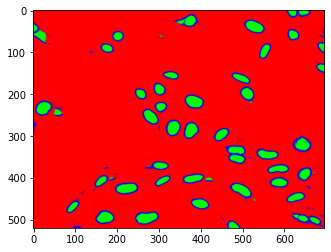

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


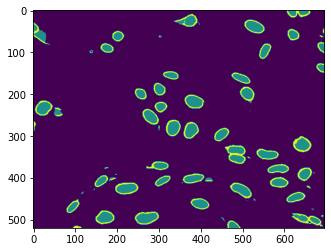

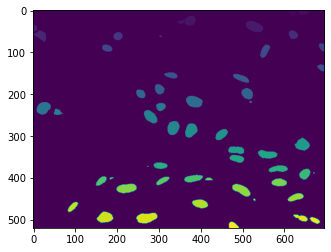

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170702000001_G07f02d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 56]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170702090001_B22f15d0.png


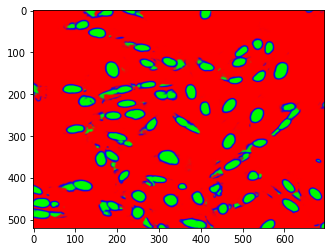

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


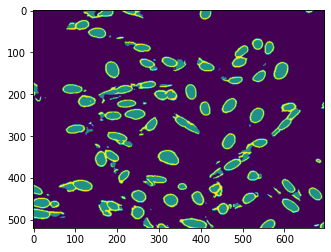

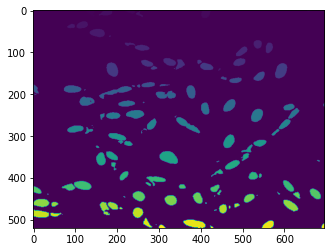

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170702090001_B22f15d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 128]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170702090001_N06f14d0.png


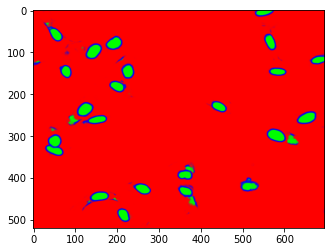

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


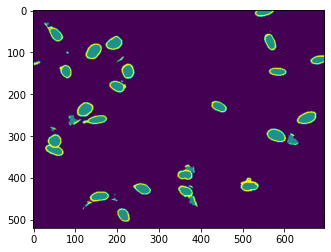

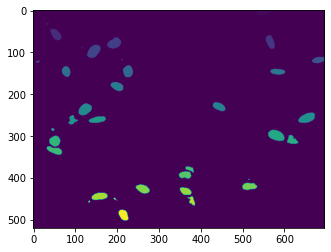

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170702090001_N06f14d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 38]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170731090001_K24f10d0.png


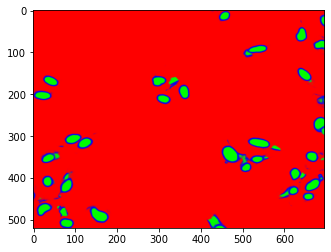

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


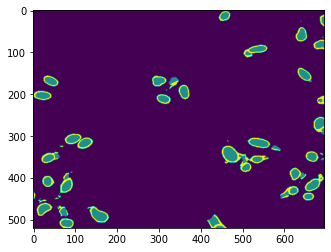

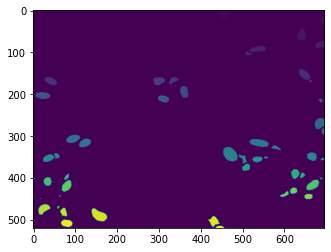

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170731090001_K24f10d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 56]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170801050001_A01f03d0.png


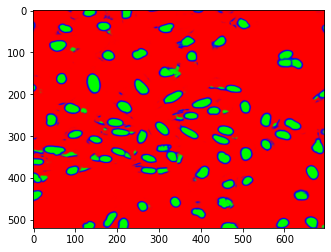

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


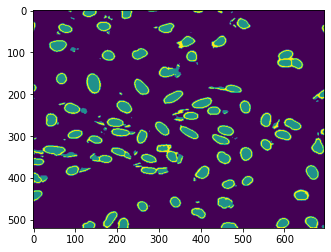

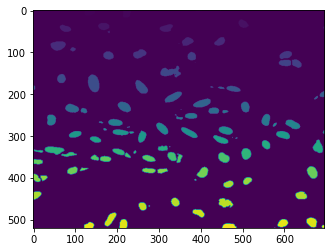

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170801050001_A01f03d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 110]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170803210001_A01f29d0.png


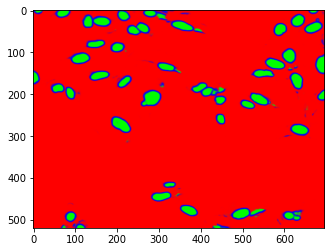

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


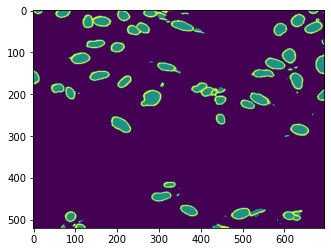

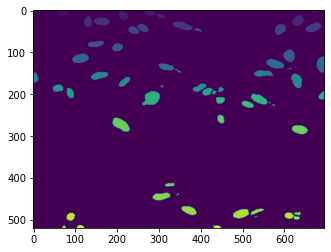

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170803210001_A01f29d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 62]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170803210001_A05f27d0.png


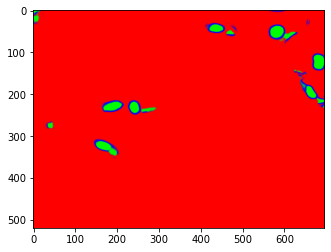

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


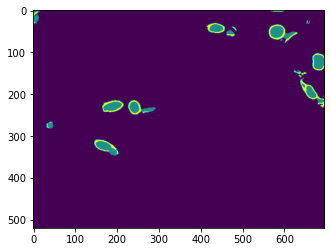

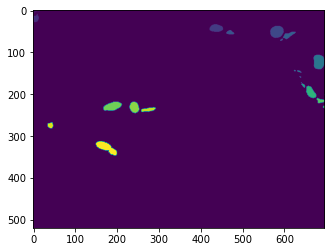

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170803210001_A05f27d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 23]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170803210001_B18f27d0.png


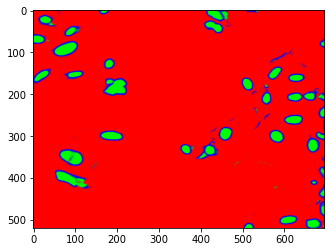

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


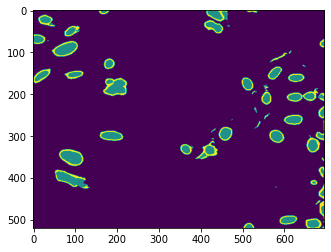

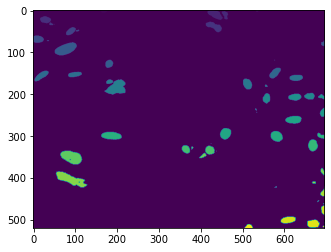

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170803210001_B18f27d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 60]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170803210001_B19f26d0.png


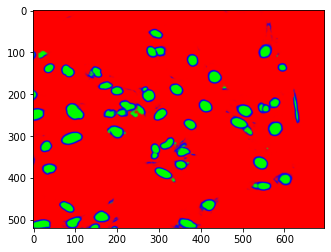

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


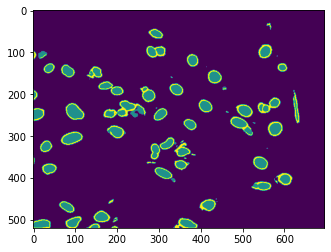

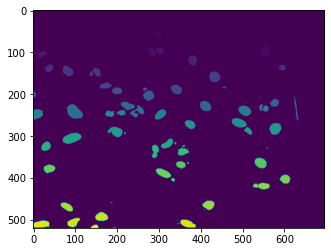

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170803210001_B19f26d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 71]. Convert image to uint8 prior to saving to suppress this warning.


MFGTMPcx7_170803210001_J12f29d0.png


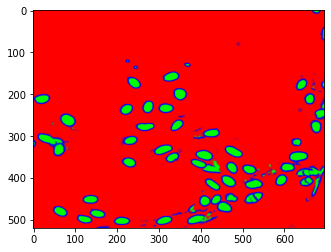

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


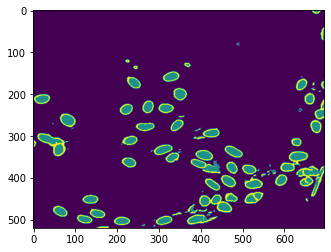

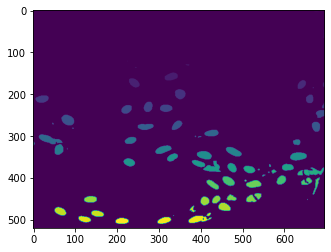

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: /home/jupyter/cell-segmentation/experiments/bbbc/out/segm/MFGTMPcx7_170803210001_J12f29d0.png is a low contrast image
Lossy conversion from int64 to uint8. Range [0, 76]. Convert image to uint8 prior to saving to suppress this warning.


In [9]:
for i in range(len(images)):

    filename = image_buffer.files[i]
    filename = os.path.basename(filename)
    print(filename)
    
    probmap = predictions[i].squeeze()
    
    plt.imshow(probmap)
    plt.show()
    
    skimage.io.imsave(config_vars["probmap_out_dir"] + filename, probmap)
    
    pred = utils.metrics.probmap_to_pred(probmap, config_vars["boundary_boost_factor"])

    plt.imshow(pred)
    plt.show()
    
    label = utils.metrics.pred_to_label(pred, config_vars["cell_min_size"])
    
    plt.imshow(label)
    plt.show()
    
    skimage.io.imsave(config_vars["labels_out_dir"] + filename, label)